# Optimizācija

Vispirms importēsim nepieciešamās bibliotēkas. `numpy` zinātnisko prēķinu veikšanai, `matplotlib.pyplot` grafiku zīmēšanai un `scipy.optimize`, kuru apgūsim šajā nodarbībā.

In [18]:
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True

## Sakņu meklēšana

Atcerēsimies, ka vienādojuma saknes ir tādas mainīgo vērtības, pie kurām vienādojums izpildās. Piemēram, vienādojuma $2x-3=0$ sakne ir $x=1.5$. Vienādojumam var gan nebūt sakņu, gan būt viena vai vairākas saknes. Piemēram, vienādojumam $\sin{x}=2$ nav reālu sakņu, jo $\sin{x}$ pieņem vērtības tikai intervāla $[-1, 1]$. Kvadrātvienādojumam $x^2=1$ ir divas saknes: $-1$ un $1$.

Vienkāršākajiem vienādojumiem saknes ir iespējams atrast analītiski. Taču, piemēram, vienādojumam $2^x-3x=0$ saknes nav iespējams atrast analītiski. `scipy` ir pieejama funkcija `scipy.optimize.root`, kas ļauj meklēt vienādojuma saknes skaitliski. Skaitliskās sakņu meklēšanas gaita notiek iteratīvi, kad sākumā uzdodam kādu saknes minējumu. Katrā iterācijā mēs iegūstam arvien precīzāku saknes minējumu. Process tiek atkārtots, kamēr minējuma precizitāte mūs apmierina. Meklējot vienādojumu saknes skaitliski, jāņem vērā vairākas nianses, kuras mēs apskatīsim šajā nodarbībā.

### Viena argumenta funkcija

Funkcija `scipy.optimize.root` pieprasa divus galvenos argumentus: funkciju, kurai mēs meklēsim saknes un saknes sākuma minējumu. Apskatīsim vienkāršu piemēru, kā strādā šī funkcija. Meklēsim saknes vienādojumam $2x=3$. Ņem vērā, ka sakņu meklēšanas funkcija prasa, ka vienādojums ir uzdots kā izteiksmes vērtība, kuru pielīdzina nullei. 

In [3]:
# Funkcija, kurai meklējam sakni
def taisne(x):
    return 2*x-3

# Meklējam funkcijas sakni, ar sākuma minējumu 10
scipy.optimize.root(taisne, x0=10)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [ 1.500e+00]
  method: hybr
    nfev: 6
    fjac: [[-1.000e+00]]
       r: [-2.000e+00]
     qtf: [ 3.708e-11]

Pie funkcijas izvada redzam rindiņu `message:`, kas saka, ka sakne ir veiksmīgi atrasta. Atrodam arī rindiņu `x:`, kura norāda vienādojuma sakni. Var redzēt, ka funkcija veiksmīgi atrada vienādojuma sakni $1.5$, par ko varam arī vienkārši pārliecināties.

Atrastajai saknes vērtībai var piekļūt:

In [4]:
scipy.optimize.root(taisne, x0=10).x[0]

1.5

<div class="alert alert-block alert-info">
<b>Tip:</b> Jāliek protokolā. Atzīmes "4" uzdevums.
</div>

**Uzdevums:** Uzrakstīt kodu, kas atrod vienādojuma $2^x+x=0$ sakni.

In [12]:
# def func(x):
#     return 2**x + x

# scipy.optimize.root(func, x0=1).x[0]

def func1(x):
    return x**2 + x

scipy.optimize.root(func1, x0=1).x[0]

0.0

**Ko darīt, ja vienādojumam ir vairākas saknes?**

Ja vienādojumam ir vairākas saknes, tad `scipy.optimize.root` atrastā sakne ir atkarīga no sākotnējā minējuma.

<div class="alert alert-block alert-info">
<b>Tip:</b> Jāliek protokolā. Atzīmes "6" uzdevums.
</div>

**Uzdevums:** Apskatīsim vienādojumu $2^x-2x=0$. Tam ir divas saknes $x=1$ un $x=2$. Pamēģināt veikt sakņu meklēšanu, ņemot dažādus sākuma minējumus (piemēram, no masīva `np.linspace(0,3,100)`). Attēlot grafiski pie kura sākuma minējuma kuru sakni atrod. 

C:\Users\atsve\AppData\Local\Temp\ipykernel_17928\591472371.py:5: RuntimeWarning: overflow encountered in power
  return 2**x - 2*x


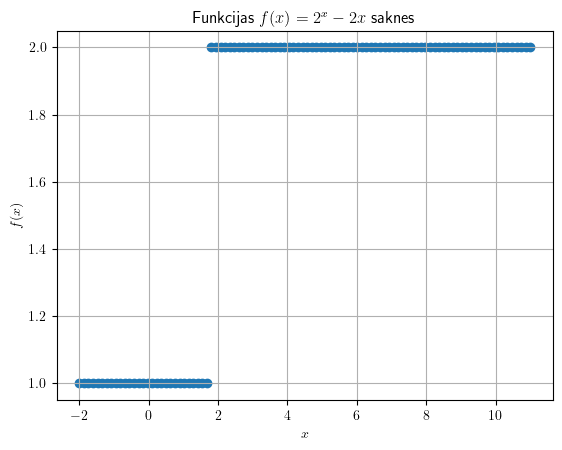

In [31]:
xes = np.linspace(-2, 11, 100)
xes_bigger = np.linspace(-50, 50, 1000)

def func1(x):
    return 2**x - 2*x

y = scipy.optimize.root(func1, x0=xes).x
# y1 = scipy.optimize.root(func1, x0=xes_bigger).x

plt.scatter(xes, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r'Funkcijas $ f(x) = 2^x - 2x $ saknes')
plt.grid(True)
# plt.scatter(xes_bigger, y1, s=7)

Skaitliski meklējot vienādojuma sakni ir jāuzmanās. Ja sakņu meklēšanas gaitā kā saknes minējums tiek izmantots punkts, kurā funkcijas atvasinājums ir $0$ (lokālā ekstrēma punkts), tad saknes meklēšana rezultējas ar kļūdu. Apskatīsim piemēru, kurā meklēsim vienādojuma $x^2=1$ sakni, ja sākotnējais minējums ir $0$.

In [7]:
def fun(x):
    return x**2-1

scipy.optimize.root(fun, x0=0)

 message: The iteration is not making good progress, as measured by the 
            improvement from the last ten iterations.
 success: False
  status: 5
     fun: [-1.000e+00]
       x: [ 0.000e+00]
  method: hybr
    nfev: 15
    fjac: [[-1.000e+00]]
       r: [ 3.250e-20]
     qtf: [ 1.000e+00]

**Kas notiek, ja vienādojumam nav sakņu?**

**Uzdevums:** Pamēģināt atrast sakni kaut kādam vienādojumam, kuram nav reālu sakņu. Ko izdod funkcija?

In [8]:
def unreal(x):
    return x**2+4

scipy.optimize.root(unreal, x0=np.sqrt(-1)).x[0]

C:\Users\atsve\AppData\Local\Temp\ipykernel_17928\3002133946.py:4: RuntimeWarning: invalid value encountered in sqrt
  scipy.optimize.root(unreal, x0=np.sqrt(-1)).x[0]


nan

### Vienādojumu sistēma
Ar funkciju `scipy.optimize.root` iespējams meklēt saknes arī vienādojumu sistēmām. Apskatīsim vienādojumu sistēmu $\cases{x^2+y^2=1 \\ x-y=0}$. 

Tai ir divi sakņu pāri $(x,y)=(\frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2})$ un $(x,y)=(-\frac{\sqrt{2}}{2}, -\frac{\sqrt{2}}{2})$.

Tādā gadījumā gan funkcijas ievads, gan izvads ir vektori. Apskatīsim piemēru augstāk minētajai vienādojumu sistēmai. Arī šajā gadījumā atrastā sakne ir atkarīga no sākuma minējuma.

**Uzdevums:** Palaist doto kodu un paskatīties, pie kādiem sākuma minējumiem kurš sakņu pāris tiek atrasts. Atbilde atkal atrodama atrisinājuma sadaļā "x"

In [9]:
# Nodefinē divu argumentu funkciju kā funkciju no vektora
def funkcija(xx):
    # Argumentus x un y izvēlas kā ievada vektora elementus 
    x = xx[0]
    y = xx[1]
    # Atgriež vienādojumu sistēmu kā vektoru
    return [x**2+y**2-1, x-y]

# Veic sakņu meklēšanu ar sākuma minējumu $(x,y)=(0,0)$
scipy.optimize.root(funkcija, x0=(15, 21)).x[:]

array([0.70710678, 0.70710678])

<div class="alert alert-block alert-info">
<b>Tip:</b> Jāliek protokolā. Atzīmes "8" uzdevums.
</div>


**Uzdevums:** Atrast saknes vienādojumu sistēmai $\cases{x-2y+3z=9 \\ -x+3y-z=-6 \\ 2x-5y+5z=17}$.

In [69]:
def fuun(xx):
    x = xx[0]
    y = xx[1]
    z = xx[2]
    return [x-2*y+3*z-9, -x+3*y-z+6, 2*x-5*y+5*z-17]

# Solve the system with initial guess (2, 2, 2)
result = scipy.optimize.root(fuun, x0=(2, 2, 2)).x[:]
print(result)

# Define the ranges for x, y, and z
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
z = np.linspace(-10, 10, 100)

# Iterate over the ranges and solve the system for each set of initial guesses
results = []
for xi, yi, zi in zip(x, y, z):
    res = scipy.optimize.root(fuun, x0=(xi, yi, zi)).x[:]
    results.append(res)

# Convert results to a numpy array for easier handling
results = np.array(results)
print(results)

[ 1. -1.  2.]
[[ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 1. -1.  

## Minimuma meklēšana
Zinātniskajā programmēšanā bieži vien ir svarīgi atrast kādas funkcijas minimumu. Piemēram, lai izvilktu līniju cauri datiem, mēs meklējam līniju, kura minimizē līnijas attālumu līdz datu punktiem kvadrātu summu. Matemātiskajā analīzē, iespējams, mācījāties, ka funkcijas minimuma punktu var atrast, pielīdzinot tās atvasinājumu nullei. Taču ne visām funkcijām tas ir vienkārši izdarāms. Šajā nodarbībā apskatīsim minimuma punktu meklēšanas funkcijas `scipy.optimize.minimize` pielietojumu un lietošanas nianses.

Apskatīsim funkciju `scipy.optimize.minimize` darbībā vienkāršajam gadījumam, funkcijai $f(x)=x^2-1$. Tā kā skaitļa kvadrāts ir nenegatīvs, tad mazākā funkcijas vērtība ir tad, kad $x=0$. Tāpat kā sakņu meklēšanas gadījumā, arī minimuma meklēšanas gadījumā nepieciešams uzdot sākotnējo minimuma punkta minējumu. Var redzēt, ka iegūtais minimuma punkts nav precīzi, bet ir aptuveni $0$. Tas ir tāpēc, ka meklēšana notiek skaitliski.

In [11]:
# nodefinē funkciju, kurai meklējam minimuma punktu
def fun(x):
    return x**2-1
# meklējam funkcijas minimumu ar sākuma minējumu x0=5
scipy.optimize.minimize(fun, x0=5)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.9999999999999993
        x: [-2.630e-08]
      nit: 3
      jac: [-3.725e-08]
 hess_inv: [[ 5.000e-01]]
     nfev: 8
     njev: 4

<div class="alert alert-block alert-info">
<b>Tip:</b> Jāliek protokolā. Atzīmes "4" uzdevums.
</div>

**Uzdevums:** Atrast minimuma punktu un minimumu funkcijai $f(x)=2^x-2x$. Minimuma meklēšanas gadījumā piekļūt minimuma punkta vērtībai var tāpat kā sakņu meklēšanas gadījumā, pieliekot galā `.x[0]`.

In [15]:
def func2(x):
    return 2**x - 2*x

print(scipy.optimize.minimize(func2, x0=0).x[0])

2**scipy.optimize.minimize(func2, x0=0).x[0] - 2*scipy.optimize.minimize(func2, x0=0).x[0]

1.528765214503879


-0.17214266411093826

**Lokālie minimumi**

Iepriekšējā piemērā funkcijai ir tieši viens minimuma punkts. Lietojot minimuma punkta meklēšanas funkciju, jāņem vērā, ka skaitliskās metodes meklē lokālā minimuma punktu. Tas, kurš lokālā minimuma punkts tiek atrasts, ir atkarīgs no izvēlētā sākuma minējuma. Apskatīsim piemēru, kā skaitliski notiek funkcijas $f(x)=x^4+x^3-2x^2$ ekstrēmu meklēšana.
<div class="alert alert-block alert-info">
<b>Tip:</b> Jāliek protokolā. Atzīmes "6" uzdevums.
</div>

**Uzdevums:** Pamēģināt veikt minimuma punktu meklēšanu funkcijai $f(x)=x^4+x^3-2x^2$, ņemot dažādus sākuma minējumus (piemēram, no masīva `np.linspace(-3,2,100)`). 
Vispirms uzzīmēt funkcijas grafiku, un aptuveni noteikti minimumus, pēc tam veikt minimumu meklēšanu ar python līdzekļiem. Attēlot grafiski pie kura sākuma minējuma kuru minimuma punktu atrod.

0.693000444444183 -1.4430004789289936 0.0


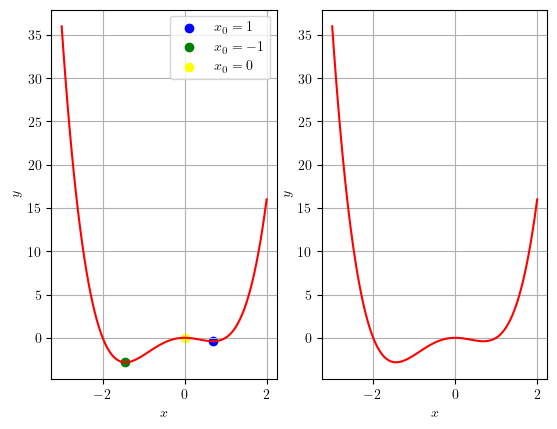

In [66]:
x4 = np.linspace(-3, 2, 100)

def equation(x):
    return x**4 + x**3 - 2*x**2

y = equation(x4)

fig, ax = plt.subplots(1, 2)
ax[0].plot(x4, y, color='red')

# Find the minimum of the function
min_result = scipy.optimize.minimize(equation, x0=1)
min_result1 = scipy.optimize.minimize(equation, x0=-1)
min_result2 = scipy.optimize.minimize(equation, x0=0)
min_x = min_result.x[0]
min_x1 = min_result1.x[0]
min_x2 = min_result2.x[0]

ax[0].scatter(min_x, equation(min_x), color='blue', label=r'$x_0=1$')
ax[0].scatter(min_x1, equation(min_x1), color='green', label=r'$x_0=-1$')
ax[0].scatter(min_x2, equation(min_x2), color='yellow', label=r'$x_0=0$')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(x4, y, color='red')
ax[1].set_xlabel(r'$x$')
ax[1].set_ylabel(r'$y$')
ax[1].grid(True)

print(min_x, min_x1, min_x2)

<div class="alert alert-block alert-info">
<b>Tip:</b> Jāliek protokolā. Atzīmes "8" uzdevums.
</div>

**Maksimizācija**

Dažreiz mūs interesē atrast nevis minimuma punktu, bet maksimuma punktu. Piemēram, ja mūsu funkcija aprēķina mūsu peļņu. Lai veiktu maksimizāciju, tam nav atsevišķas komandas, bet to var viegli realizēt, pareizinot mērķa funkciju ar $-1$. Respektīvi, $0$ ir funkcijas $f(x)=x^2$ minimuma punkts, bet funkcijas $f(x)=-x^2$ maksimuma punkts.

**Uzdevums:** Atrast funkcijas $f(x)=\ln{x}-x$ maksimuma punktu un maksimālo vērtību. Naturālo logaritmu aprēķina ar `np.log(x)`. Jāiegūst, ka maksimuma punkts ir $x=1$ un funkcijas maksimums ir $-1$.

In [79]:
# Rakstīt atrisinājumu šeit
def func3(x):
    return np.log(x) - x

# Define a negative version of func3 to use minimization
def neg_func3(x):
    return -func3(x)

# Use an initial guess within the domain (x > 0)
res = scipy.optimize.minimize(neg_func3, x0=1)

max_point = res.x[0]
max_value = func3(max_point)

print("Maximum point:", max_point)
print("Maximum of the function:", max_value)

Maximum point: 1.0
Maximum of the function: -1.0
